# 1 Loading the dataset: 
Load the data and import the libraries 

In [1]:
#Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use('dark_background')

In [2]:
#Reading the csv file
df = pd.read_csv('/Users/apple/Documents/ML Prep/Zomato EDA/zomato.csv')

# 2. Data Cleaning:
• Deleting redundant columns 

• Renaming the columns

• Dropping duplicates 

• Cleaning individual columns

• Remove the NaN values from the dataset 

• Some Transformations

In [3]:
#Basic View of the data
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
#Basic info of the data
df.shape

(51717, 17)

In [5]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [6]:
#Looking at the dataset and corresponding missing values and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [7]:
#Deleting the colums which arent required["url","dish_liked","phone"]
df=df.drop(["url","dish_liked","phone"],axis=1)

In [8]:
#Removing the Duplicates
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [9]:
#Remove the NaN values from dataset
df.isnull().sum()
df.dropna(how='any',inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43499 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   address                      43499 non-null  object
 1   name                         43499 non-null  object
 2   online_order                 43499 non-null  object
 3   book_table                   43499 non-null  object
 4   rate                         43499 non-null  object
 5   votes                        43499 non-null  int64 
 6   location                     43499 non-null  object
 7   rest_type                    43499 non-null  object
 8   cuisines                     43499 non-null  object
 9   approx_cost(for two people)  43499 non-null  object
 10  reviews_list                 43499 non-null  object
 11  menu_item                    43499 non-null  object
 12  listed_in(type)              43499 non-null  object
 13  listed_in(city)              43

In [11]:
#Reading the column names
df.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'approx_cost(for two people)',
       'reviews_list', 'menu_item', 'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [12]:
#Changing the column names
df=df.rename(columns={'approx_cost(for two people)':'cost','listed_in(type)':'type', 'listed_in(city)':'city'})
df.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'cost', 'reviews_list',
       'menu_item', 'type', 'city'],
      dtype='object')

In [13]:
#DataType Transformations
#Changing the cost to string
df['cost']=df['cost'].astype(str)

#Using lambda function to replace ',' from cost
df['cost']=df['cost'].apply(lambda x:x.replace(',','.'))

#Changing the cost to float
df['cost']=df["cost"].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43499 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   address       43499 non-null  object 
 1   name          43499 non-null  object 
 2   online_order  43499 non-null  object 
 3   book_table    43499 non-null  object 
 4   rate          43499 non-null  object 
 5   votes         43499 non-null  int64  
 6   location      43499 non-null  object 
 7   rest_type     43499 non-null  object 
 8   cuisines      43499 non-null  object 
 9   cost          43499 non-null  float64
 10  reviews_list  43499 non-null  object 
 11  menu_item     43499 non-null  object 
 12  type          43499 non-null  object 
 13  city          43499 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 5.0+ MB


In [14]:
#Determining the Unique Ratings
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [15]:
#Removing '/5' from rates
df = df.loc[df.rate != "NEW"]
df = df.loc[df.rate != "-"].reset_index(drop=True)
remove_slash = lambda x: x.replace('/5','')if type(x) == np.str else x
df.rate = df.rate.apply(remove_slash).str.strip().astype('float')
df['rate'].head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [16]:
 #Adjust the Column names
df.name=df.name.apply(lambda x:x.title())
df.online_order.replace(("Yes","No"),(True,False),inplace=True)
df.book_table.replace(("Yes","No"),(True,False),inplace=True)
df.cost.unique()

array([800.  , 300.  , 600.  , 700.  , 550.  , 500.  , 450.  , 650.  ,
       400.  , 900.  , 200.  , 750.  , 150.  , 850.  , 100.  ,   1.2 ,
       350.  , 250.  , 950.  ,   1.  ,   1.5 ,   1.3 , 199.  ,   1.1 ,
         1.6 , 230.  , 130.  ,   1.7 ,   1.35,   2.2 ,   1.4 ,   2.  ,
         1.8 ,   1.9 , 180.  , 330.  ,   2.5 ,   2.1 ,   3.  ,   2.8 ,
         3.4 ,  50.  ,  40.  ,   1.25,   3.5 ,   4.  ,   2.4 ,   2.6 ,
         1.45,  70.  ,   3.2 , 240.  ,   6.  ,   1.05,   2.3 ,   4.1 ,
       120.  ,   5.  ,   3.7 ,   1.65,   2.7 ,   4.5 ,  80.  ])

In [17]:
df.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,True,True,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,True,False,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,True,False,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,False,False,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,False,False,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [18]:
#Encode the input Variables

def Encode(df):
    for column in df.columns[~df.columns.isin(['rate','cost','votes'])]:
        df[column] = df[column].factorize()[0]
    return df

df_en=Encode(df.copy())


In [19]:
df_en

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
0,0,0,0,0,4.1,775,0,0,0,800.0,0,0,0,0
1,1,1,0,1,4.1,787,0,0,1,800.0,1,0,0,0
2,2,2,0,1,3.8,918,0,1,2,800.0,2,0,0,0
3,3,3,1,1,3.7,88,0,2,3,300.0,3,0,0,0
4,4,4,1,1,3.8,166,1,0,4,600.0,4,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41232,3137,2699,1,1,3.7,34,25,28,204,800.0,4028,0,6,29
41233,8791,1716,1,1,2.5,81,25,28,761,800.0,21082,0,6,29
41234,8725,6532,1,1,3.6,27,25,17,240,1.5,20956,0,6,29
41235,8786,6568,1,0,4.3,236,56,17,237,2.5,21054,0,6,29


Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'cost', 'reviews_list',
       'menu_item', 'type', 'city'],
      dtype='object')

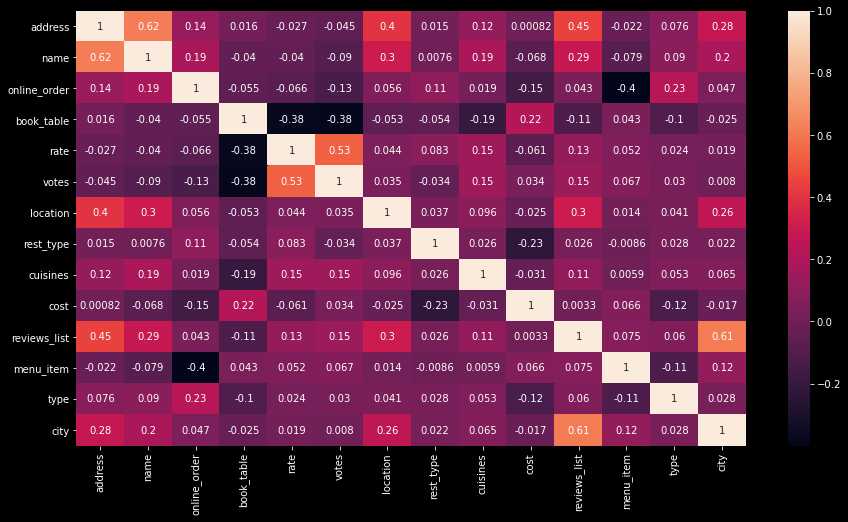

In [20]:
#Get the Corelation between different Variables
corr = df_en.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr,annot=True)
df_en.columns

#### The Highest corelation is between name and the address(0.62)

# Data Visualization

#### QUESTIONS BEING ANSWERED

Data Visualization: Using plots to find relations between the features. 

• Restaurants delivering Online or not 

• Restaurants allowing table booking or not

• Table booking Rate vs Rate

• Best Location

• Relation between Location and Rating

• Restaurant Type 

• Gaussian Rest type and Rating 

• Types of Services

• Relation between Type and Rating

• Cost of Restuarant

• No. of restaurants in a Location 

• Restaurant type 

• Most famous restaurant chains in Bengaluru

Text(0.5, 1.0, 'Restraunts delivering online or not')

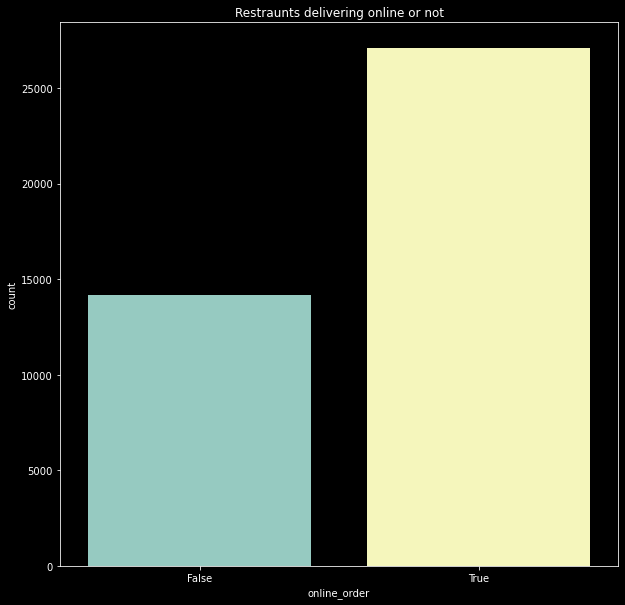

In [21]:
#Restaurants delivering Online or not
sns.countplot(df["online_order"])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Restraunts delivering online or not')

##### Appx we can conclude that 15k dosent deliver online leaving the 26k

Text(0.5, 1.0, 'Restraunts allowing table booling or not')

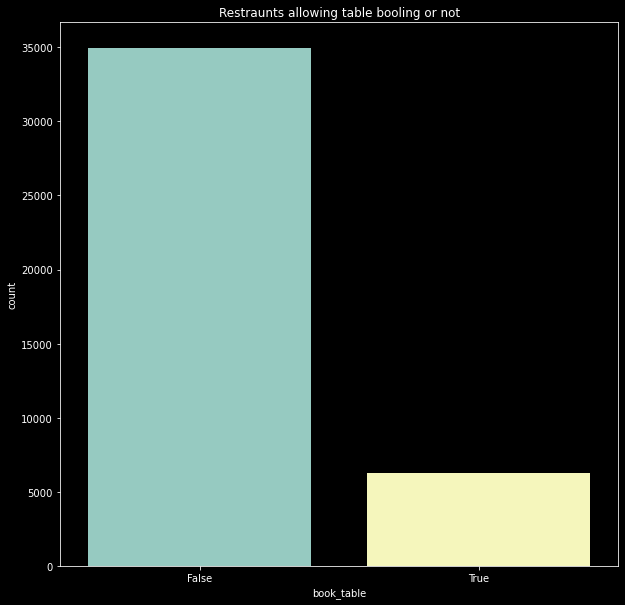

In [22]:
#Restaurants allowing table booking or not
sns.countplot(df["book_table"])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Restraunts allowing table booling or not')

##### Almost 5k restraunts allow table booking leaving the 35k+

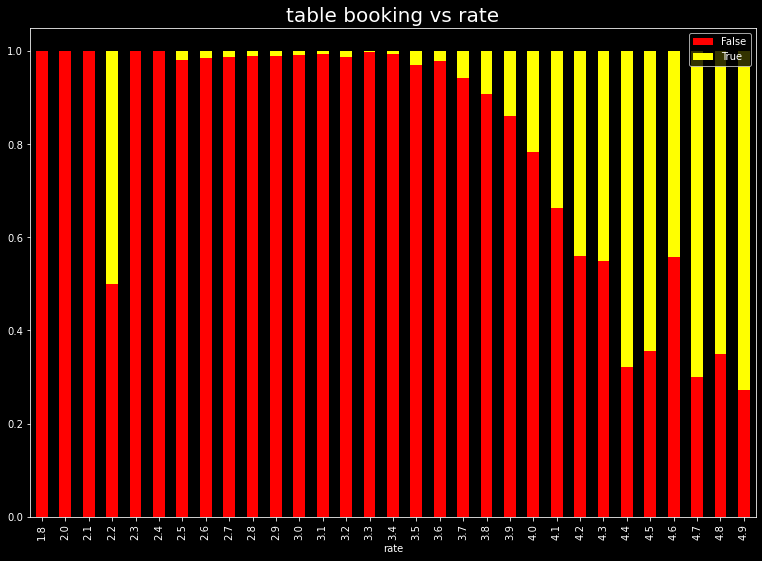

In [23]:
#Table booking Rate vs Rate
plt.rcParams['figure.figsize'] = (13, 9)
Y= pd.crosstab (df['rate'], df['book_table'])
Y.div(Y.sum(1).astype(float), axis=0).plot(kind ="bar", stacked= True, color=["red", "yellow"]) 
plt.title( 'table booking vs rate', fontweight= 30, fontsize=20)
plt.legend (loc="upper right")
plt.show()

Text(0.5, 1.0, 'Location')

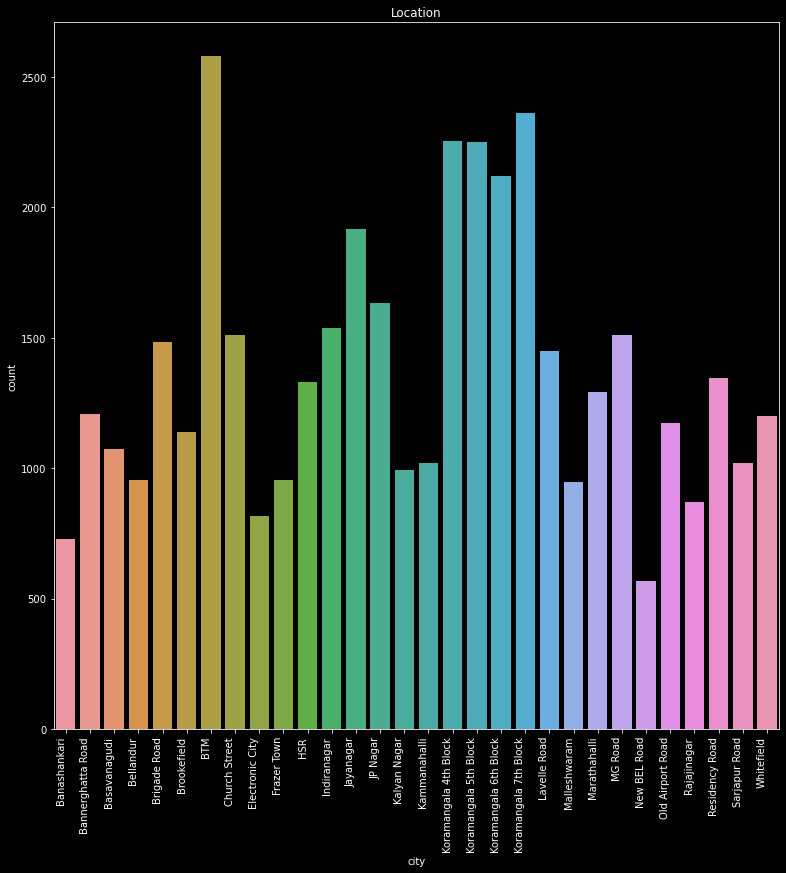

In [24]:
#Best Location
sns.countplot(df['city'])

sns.countplot(df['city']).set_xticklabels(sns.countplot(df['city']).get_xticklabels(), rotation=90, ha="right") 
fig= plt.gcf()

fig.set_size_inches(13,13)

plt.title('Location')

##### Highest Number of Restraunts are in BTM and next close to that comes Koramngala 6th block

(array([   0.,  500., 1000., 1500., 2000., 2500., 3000., 3500., 4000.,
        4500.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

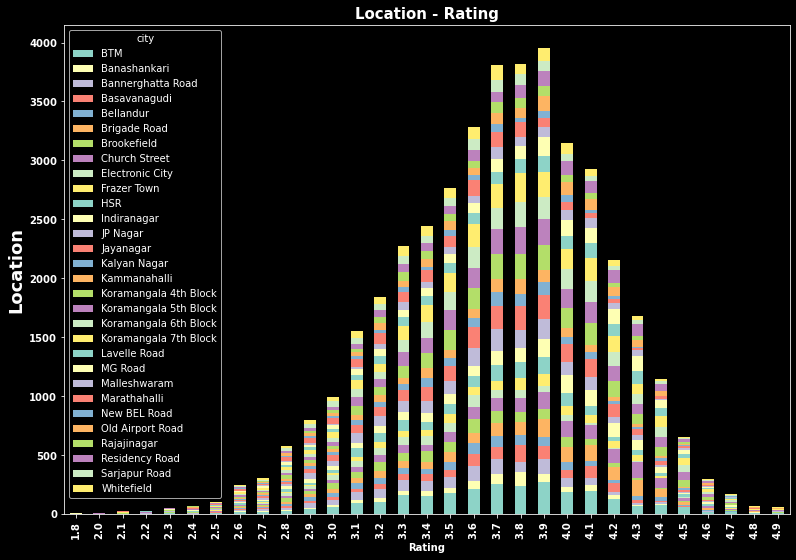

In [25]:
#Location Vs Rating
loc_plt=pd.crosstab(df ['rate'], df['city'])

loc_plt.plot(kind= 'bar',stacked=True)

plt.title('Location - Rating', fontsize=15, fontweight='bold')

plt.ylabel('Location', fontsize=18, fontweight='bold')

plt.xlabel('Rating', fontsize=10, fontweight='bold')

plt.xticks (fontsize=10, fontweight='bold')

plt.yticks (fontsize=10, fontweight="bold")



###### Most of the restraunts ratings lies between 3.1-4.4

Text(0.5, 1.0, 'Restraunt Types')

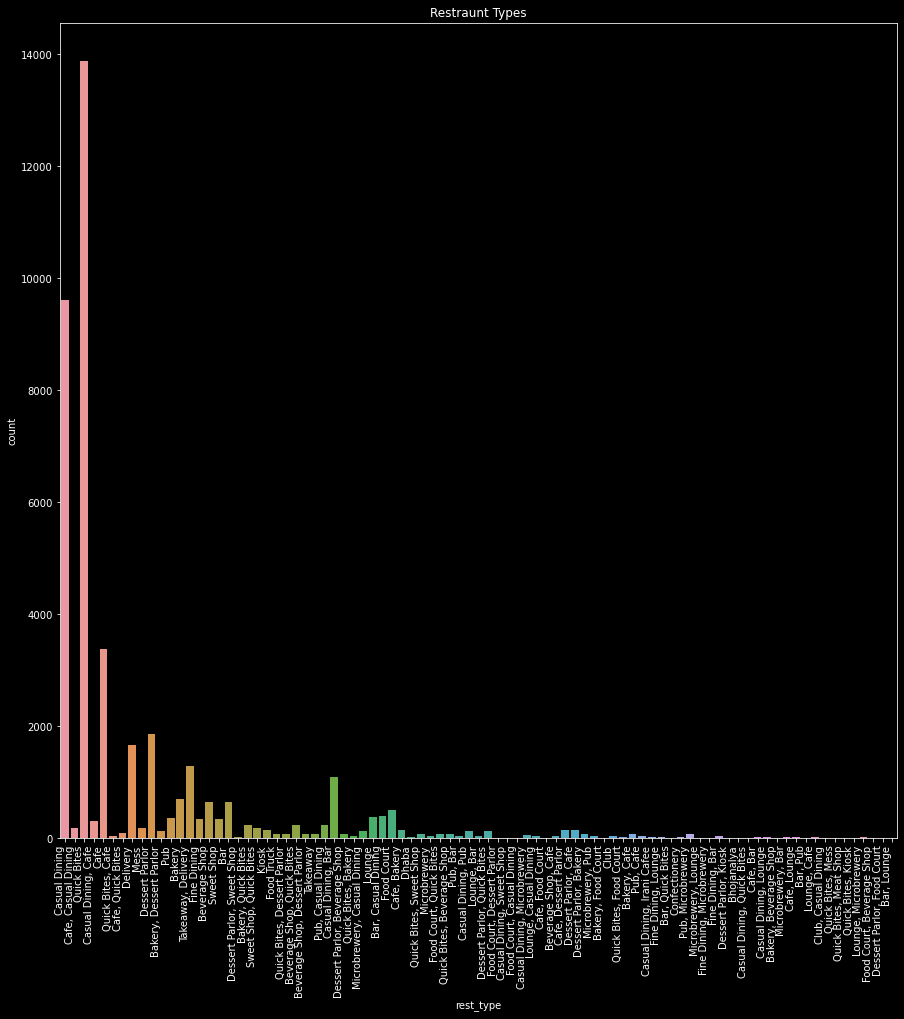

In [26]:
#Restraunt Type
sns.countplot(df['rest_type'])
sns.countplot(df['rest_type']).set_xticklabels(sns.countplot(df['rest_type']).get_xticklabels(), rotation=90, ha="right")
fig= plt.gcf()

fig.set_size_inches(15,15)

plt.title('Restraunt Types')

##### Most of the restraunts are of quickbytes type

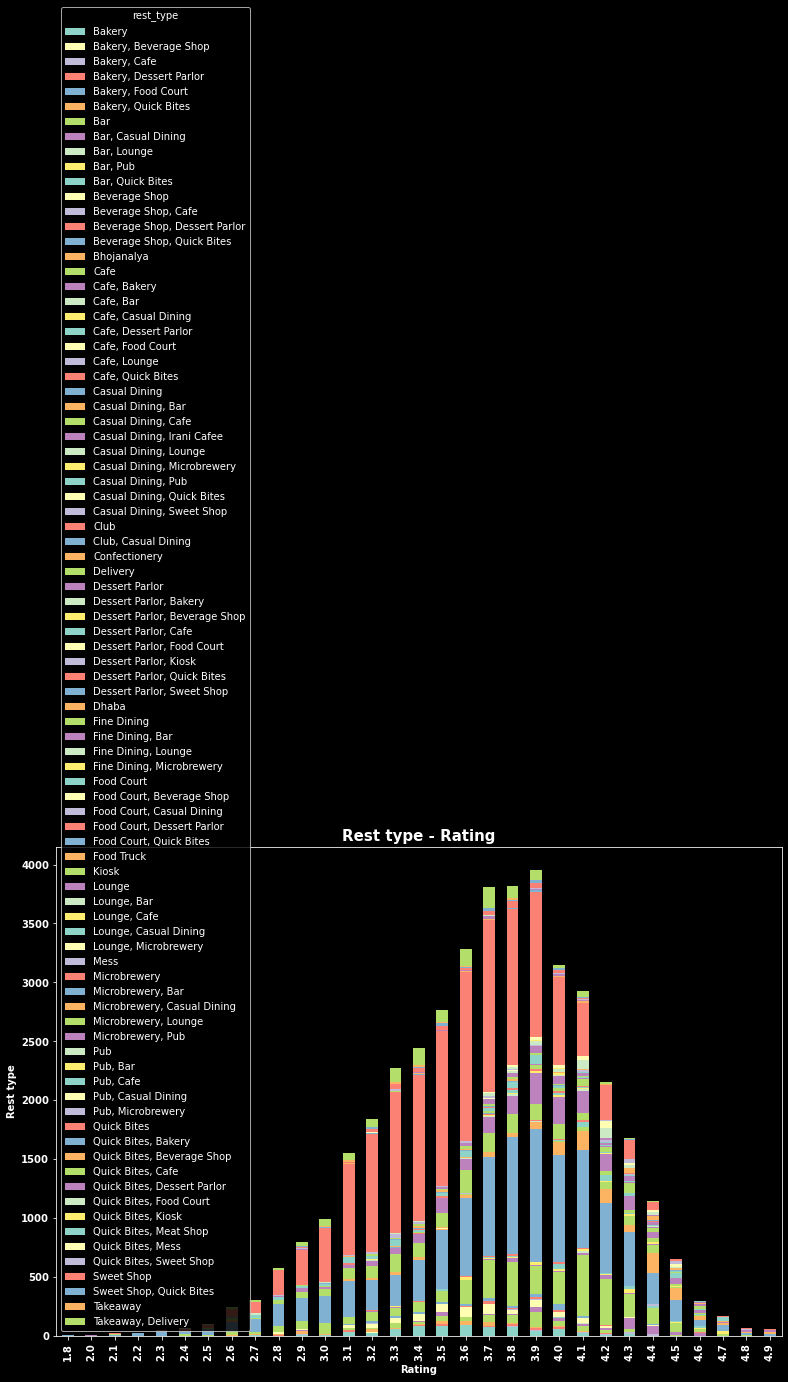

In [27]:
#RestType vs Rating
loc_plt=pd.crosstab(df_en['rate'], df['rest_type'])
loc_plt.plot(kind='bar',stacked=True)
plt.title('Rest type - Rating', fontsize=15, fontweight='bold') 


plt.ylabel('Rest type',fontsize=10, fontweight="bold")

plt.xlabel('Rating', fontsize=10, fontweight="bold")

plt.xticks (fontsize= 10, fontweight="bold")

plt.yticks (fontsize=10, fontweight='bold');


##### Most of the restraunts have good ratings lieing betweem 3.4-4.3

Text(0.5, 1.0, 'Type of Service')

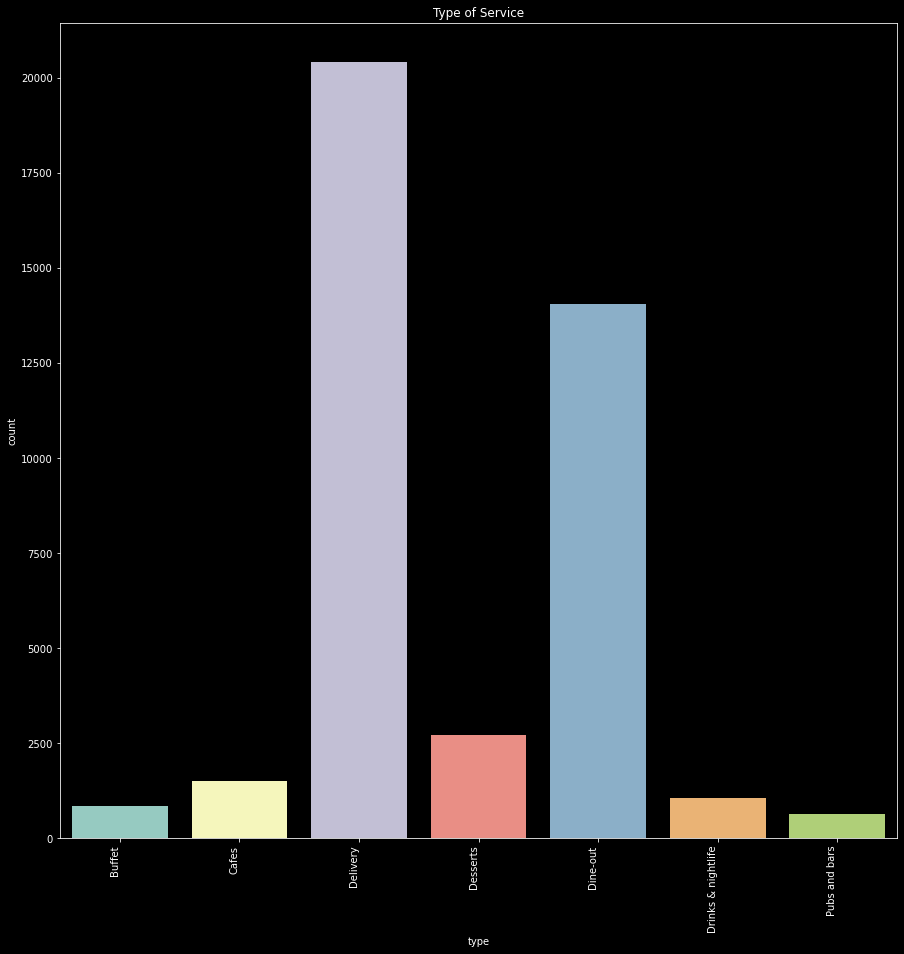

In [28]:
sns.countplot(df['type'])
sns.countplot(df['type']).set_xticklabels(sns.countplot(df['type']).get_xticklabels(),rotation=90,ha='right')
fig = plt.gcf()
fig.set_size_inches(15,15)
plt.title('Type of Service')

##### More than 21k restraunts provide delivery service and then comes dineout with almost 14k

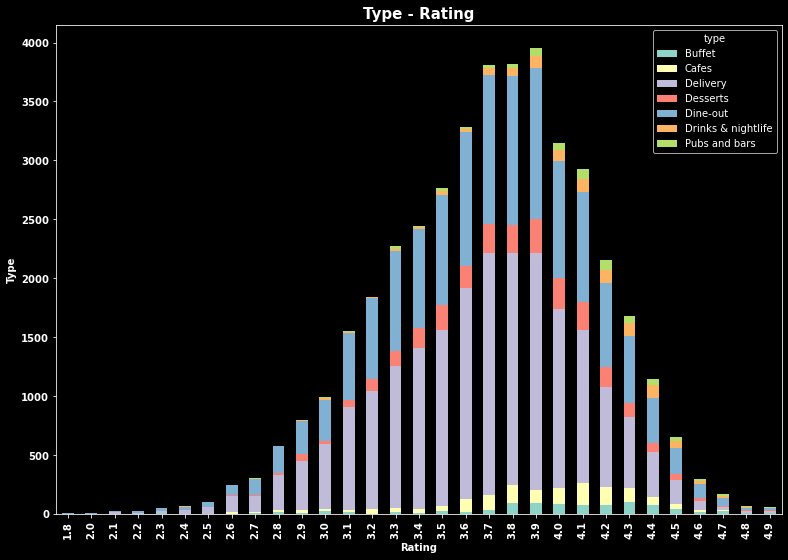

In [29]:
#Type vs Rating
type_plt=pd.crosstab(df['rate'], df['type'])
type_plt.plot(kind='bar',stacked=True)
plt.title('Type - Rating', fontsize=15, fontweight='bold') 


plt.ylabel('Type',fontsize=10, fontweight="bold")

plt.xlabel('Rating', fontsize=10, fontweight="bold")

plt.xticks (fontsize= 10, fontweight="bold")

plt.yticks (fontsize=10, fontweight='bold');


###### Almost 4k restraunts having 3.9 rating 

Text(0.5, 1.0, 'Cost of Restraunt')

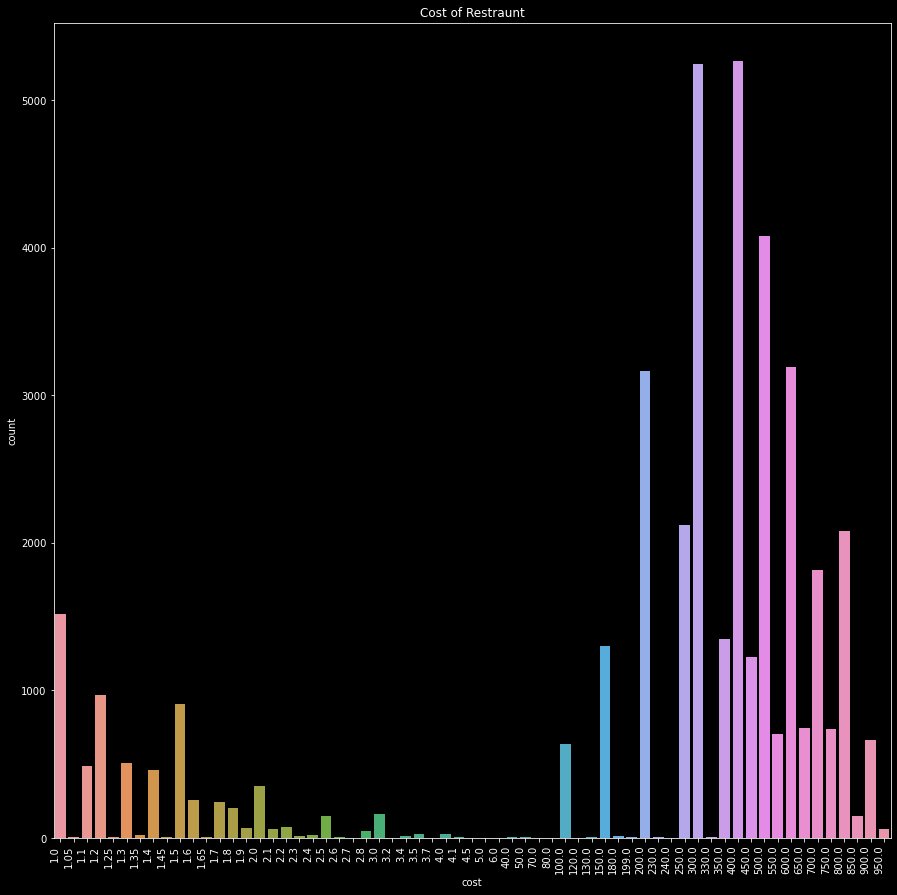

In [30]:
#Cost of restraunt 
sns.countplot(df['cost'])

sns.countplot(df['cost']).set_xticklabels(sns.countplot(df['cost']).get_xticklabels(), rotation=90, ha="right") 
fig= plt.gcf()

fig.set_size_inches(15,15)

plt.title('Cost of Restraunt')

###### Most restraunts food price falls in the range 350-550

Text(0.5, 1.0, 'No. of restaurants in a Location')

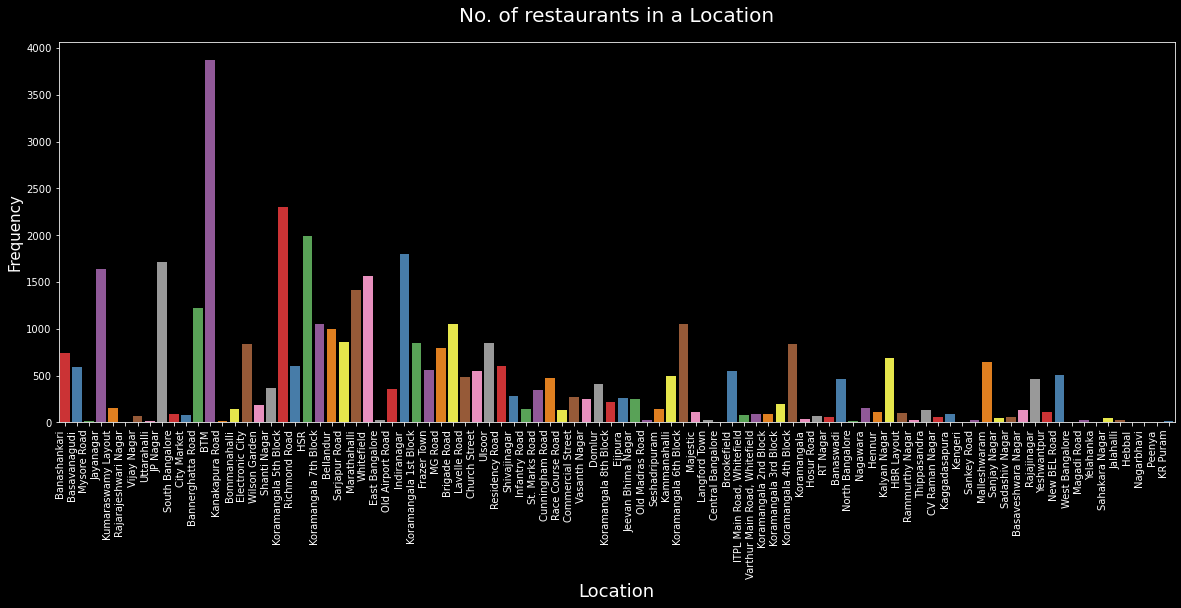

In [31]:
#No. of restraunts in a location
fig = plt.figure(figsize=(20,7))
loc=sns.countplot(x="location", data=df, palette= "Set1")
loc.set_xticklabels (loc.get_xticklabels(), rotation=90, ha="right")
plt.ylabel("Frequency",size=15)
plt.xlabel("Location",size=18)
loc
plt.title('No. of restaurants in a Location', size = 20,pad=20)




##### Highest Number of Restraunts are in BTM and next close to that comes Koramngala 6th block

Text(0.5, 1.0, 'Restaurant types')

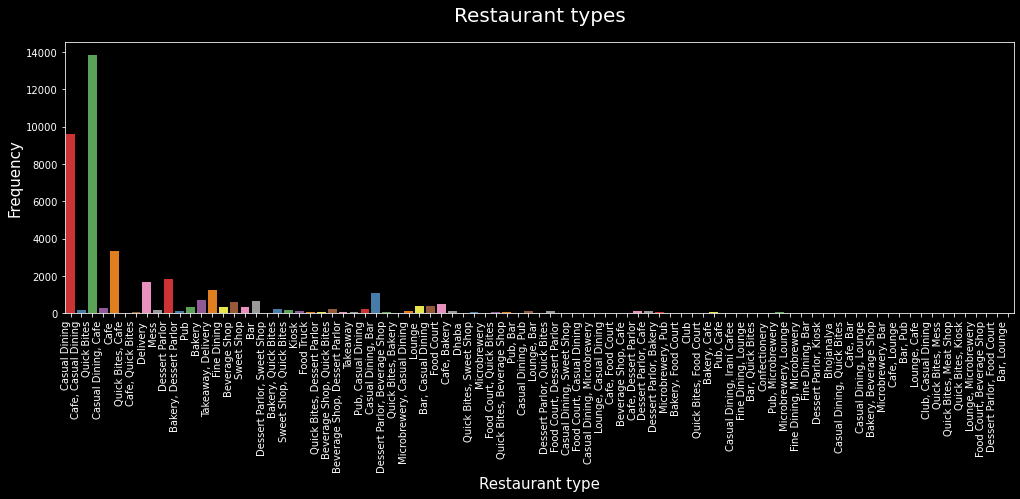

In [32]:
#Restraunt Type
fig= plt.figure(figsize=(17,5))
rest=sns.countplot(x="rest_type", data=df, palette = "Set1")
rest.set_xticklabels (rest.get_xticklabels(), rotation=90, ha="right")
plt.ylabel("Frequency",size=15)
plt.xlabel("Restaurant type", size=15)
rest
plt. title('Restaurant types', fontsize = 20,pad=20)

Text(0.5, 0, 'Number of outlets')

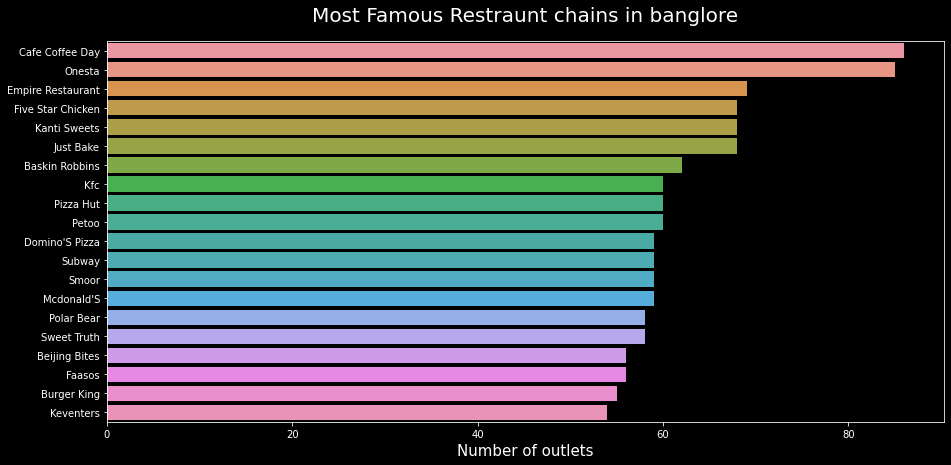

In [33]:
plt.figure(figsize=(15,7))
chains=df['name'].value_counts()[:20]
sns.barplot(x=chains,y=chains.index)
plt.title("Most Famous Restraunt chains in banglore",size=20,pad=20)
plt.xlabel("Number of outlets",size=15)

###### From this graph we can conclude that the most famous restraunt change in Blr is Cafe Coffe day